# In-Class Assignment: Agent Based Modeling of Superbugs (part 2)
## With more code review!
# Day 09
# CMSE 202

<img src="http://www2.cs.uidaho.edu/~jeffery/vslc/hatereading.png" width=600px>
<p style="text-align: right;">
    
Source: http://abstrusegoose.com/strips/you_down_wit_OPC-yeah_you_know_me.png ; thanks to Bruce Bolden</p>

<!--
<img src="http://abstrusegoose.com/strips/you_down_wit_OPC-yeah_you_know_me.png" width=600px>
<p style="text-align: right;">Amusing comic from: http://abstrusegoose.com/ </p>
-->

### <p style="text-align: right;"> &#9989; **Khushi** </p>
#### <p style="text-align: right;"> &#9989; Mary, jamie, Kate, Sam, Ryleigh</p>

## Agenda for today's class

- [Part 1: Pre-class assignment review and discussion](#pca-review)
- [Part 2: Revisiting your assignment from last class, building your Python class(es)](#revisit)
- [Part 3: Understanding someone else's code](#someone-else)
- [Part 4: Reviewing the provided code](#code-review)
- [Part 5: Running the simulation](#simulation)
- [Part 6: Testing Scientific Questions](#testing)

---
<a id="pca-review"></a>
## Part 1. Pre-class assignment review and discussion

Did anyone have any specific issues with the pre-class assignment?

Let's take a moment to highlight some key concepts. **Discuss with your group** the following prompts and write down a some brief notes from your discussion.

&#9989; **Question 1:** What did you see as some of the key differences, advantages, and disadvantages in the linear, functional, and object oriented programming approaches you reviewed in the pre-class assignment?

<font size=+3>&#9998;</font> 1.linear: advantages-simpler to work with linear equations, disadvantages- complex for large scale problems, and is limied only to linear problems. 2.advantages-immutability, disadvantages-fewer resources 3.Object oriented programming: advantage- reusablitity of code disadvantage- complexity with new systems 

&#9989; **Question 2:** What is a Python "docstring", how it is used, and why is it useful?

<font size=+3>&#9998;</font> Docstrings provide a convenient way of associating documentation with Python modules, functions, classes, and methods.An object’s docsting is defined by including a string constant as the first statement in the object’s definition. It’s specified in source code that is used, like a comment, to document a specific segment of code.Docstrings are a really useful way of adding descriptive information to your code so that it is easier for others to use and easier for us to remember what we were doing with our own code from the past

---
<a id="revisit"></a>
##  Part 2. Revisiting your assignment from last class, building your Python class(es)

Now that you've had a bit more time to think about objected oriented programming and review some code that was written to build an agent-based model in an objected oriented way, **you're going to spend the first 30 minutes of your group activity time picking up where you left off with your "superbugs" model.**

**&#9989; Do This:** Take this time to review the progress you made last week on initializing your petri dish. If you didn't finish it, try to finish it. If you finished it, review your code and think about ways you might be able to make it better. Reviewing your own code will sometimes feel like looking at someone else's code. You might find that your "present self" isn't a huge fan of how your "past self" did things (especially if your past self didn't leave you any comments!). **Do this as a group!**

Copy your code from last time into this notebook and try to get your petri dish code working or make improvements to a functioning version.

**If you already managed to get the basic petri dish initialization working, start building other methods that would be necessary to evolve the model**.

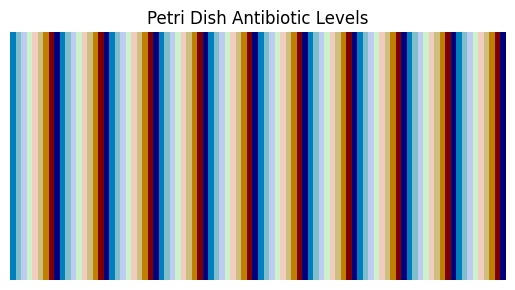

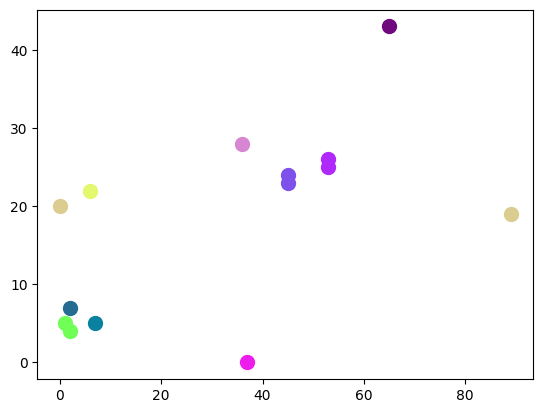

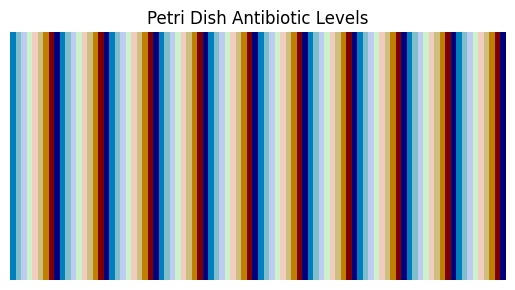

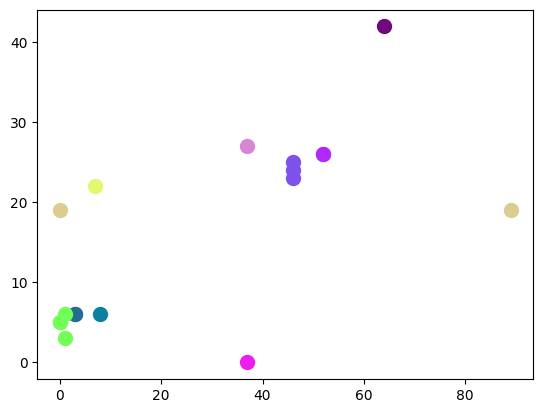

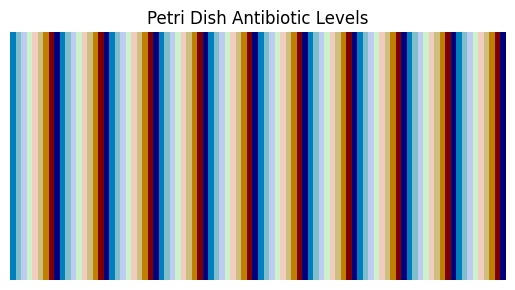

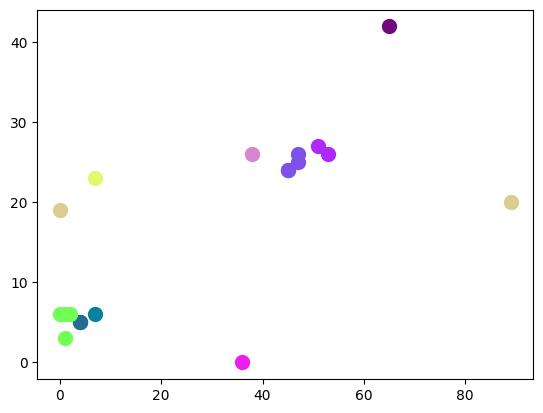

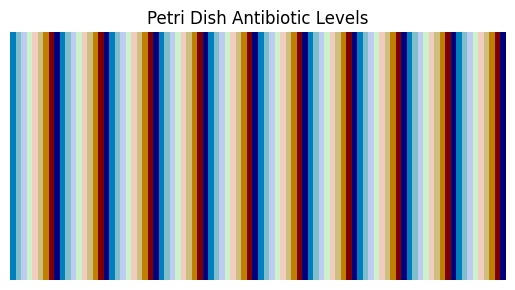

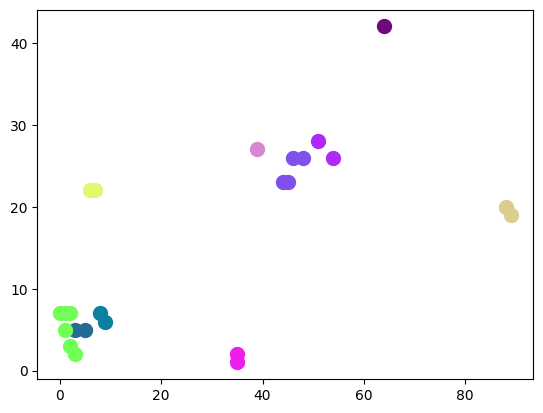

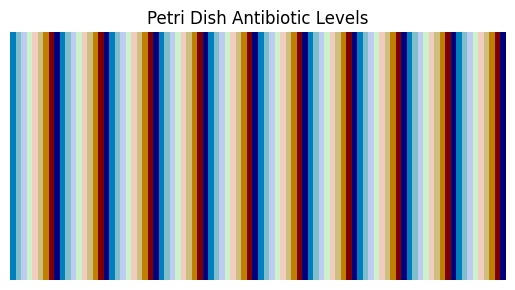

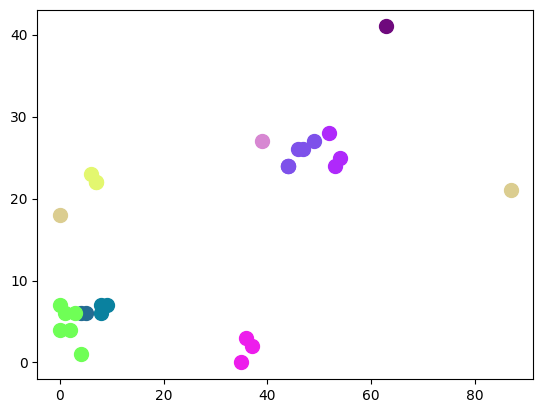

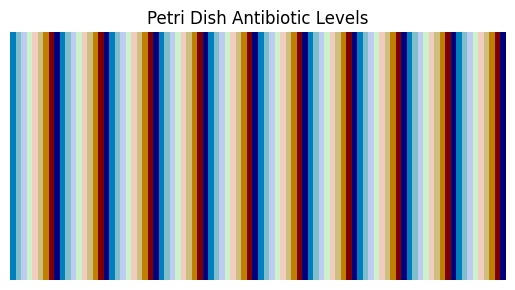

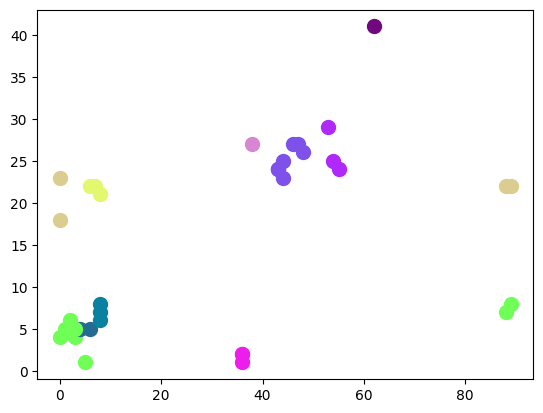

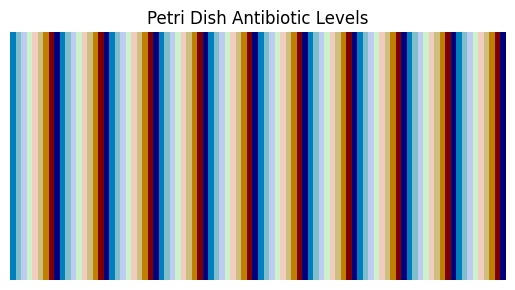

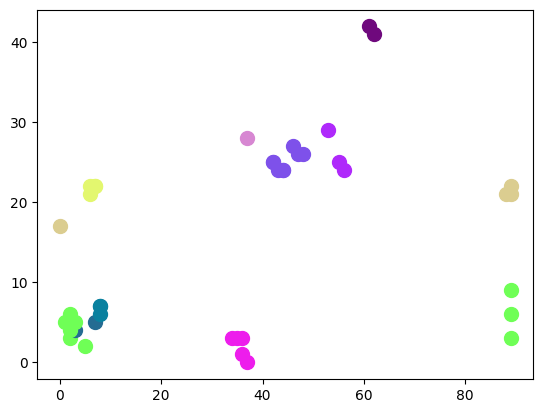

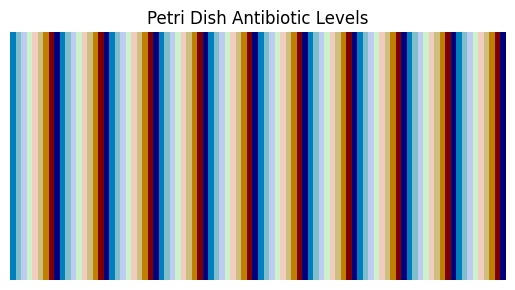

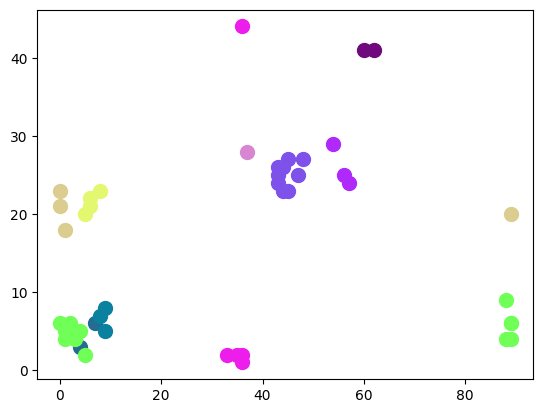

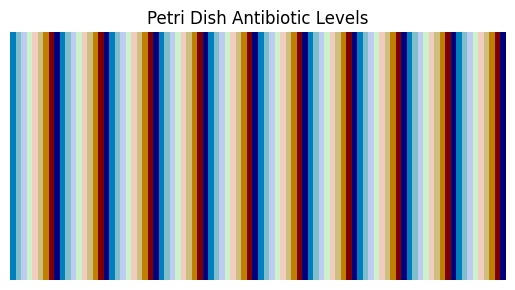

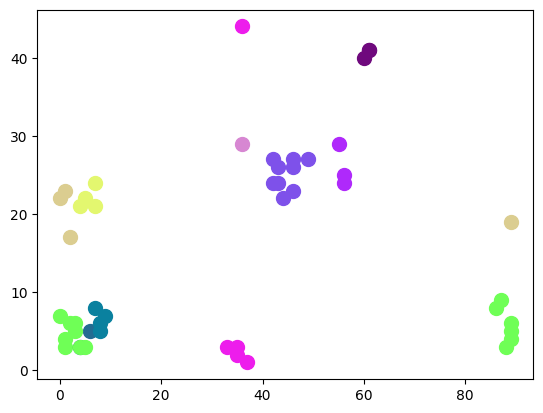

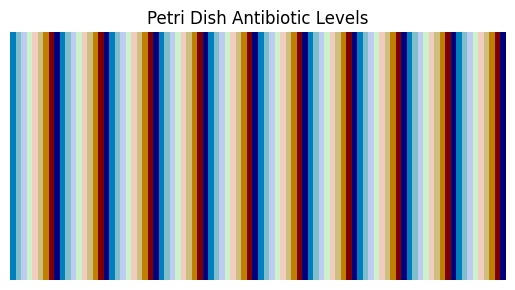

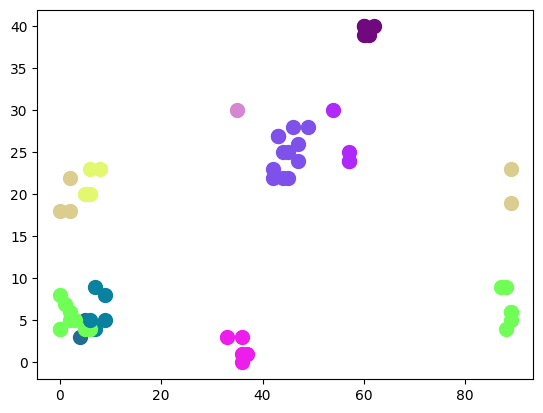

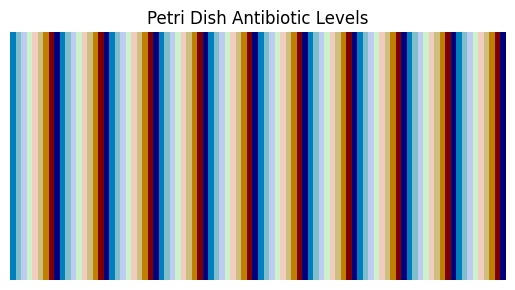

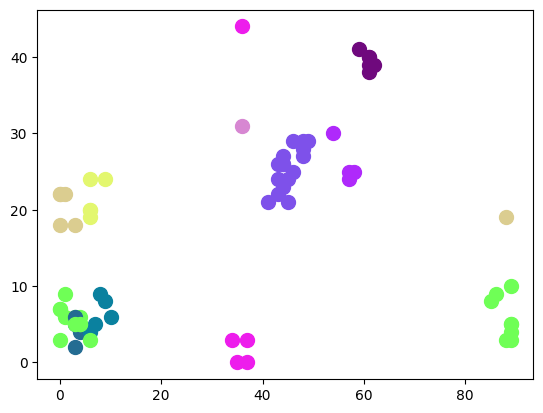

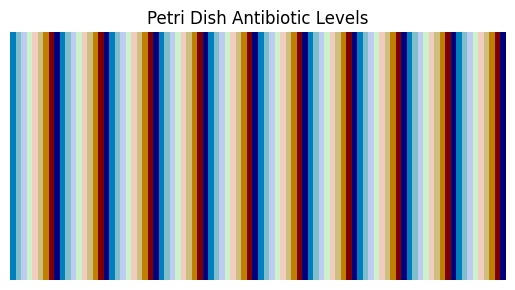

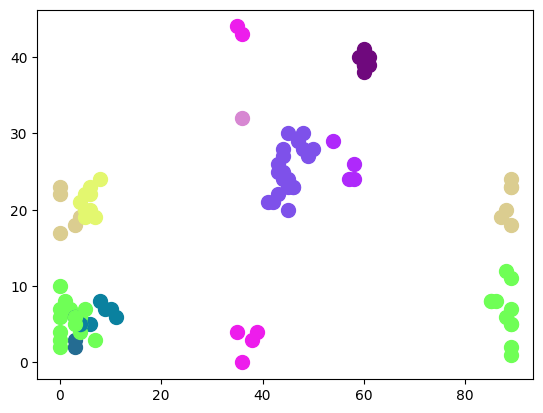

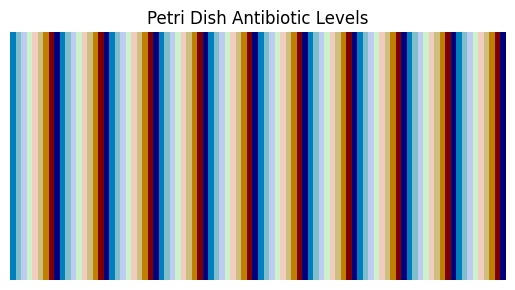

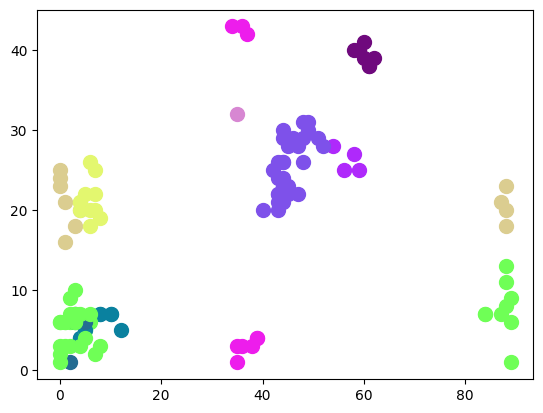

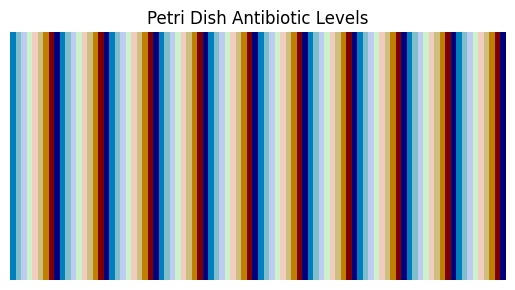

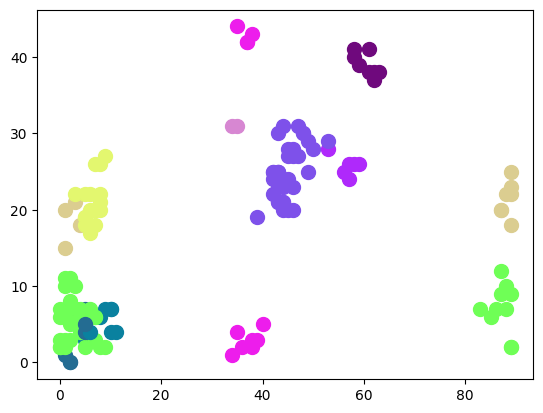

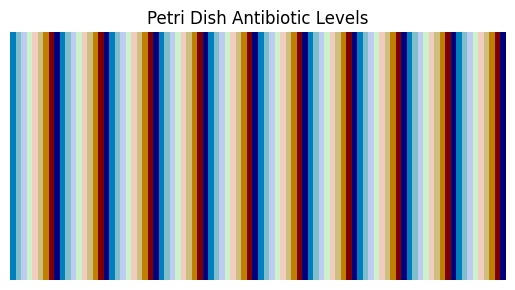

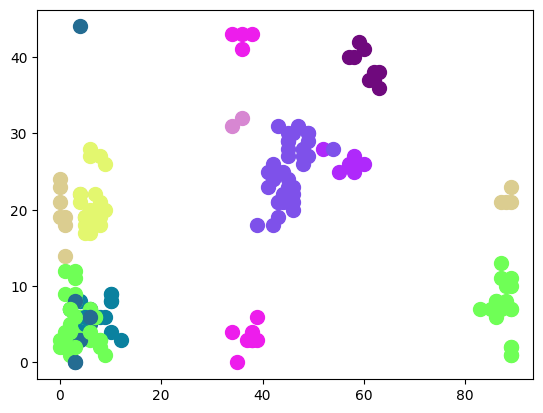

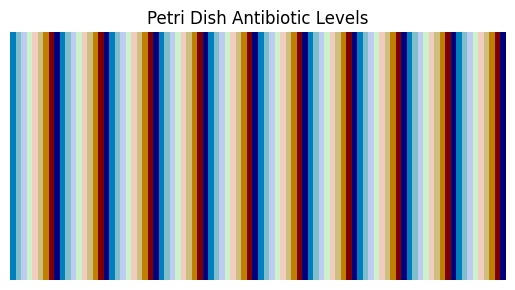

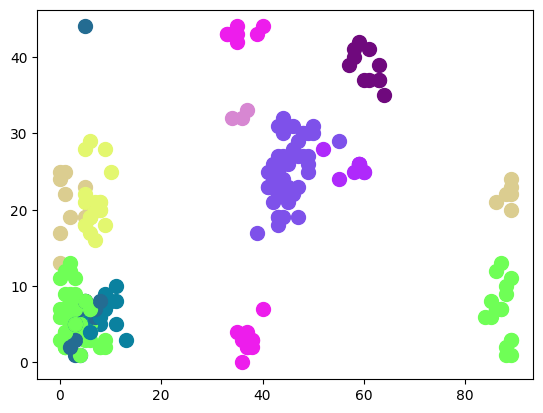

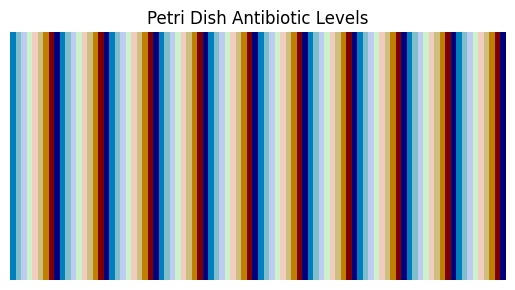

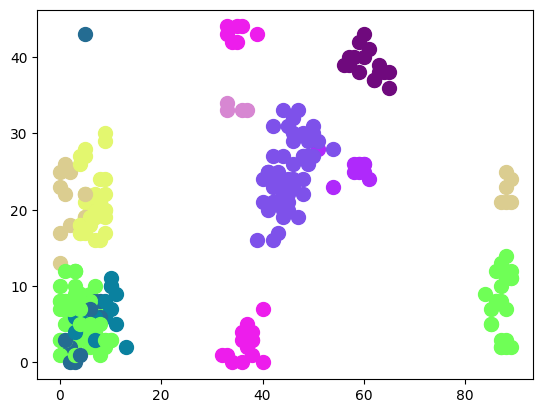

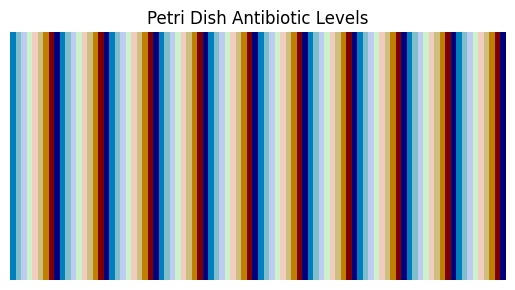

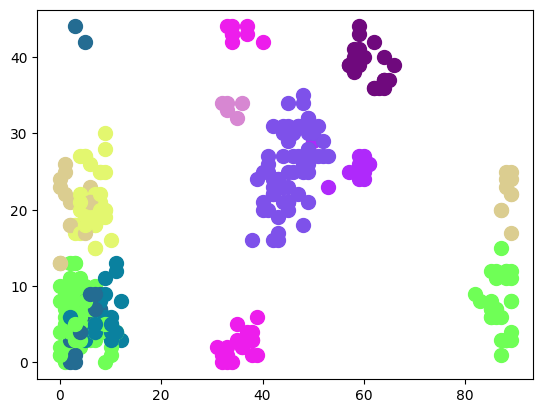

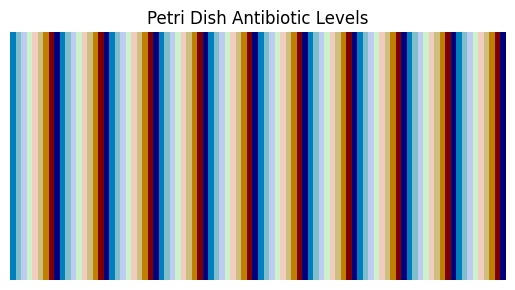

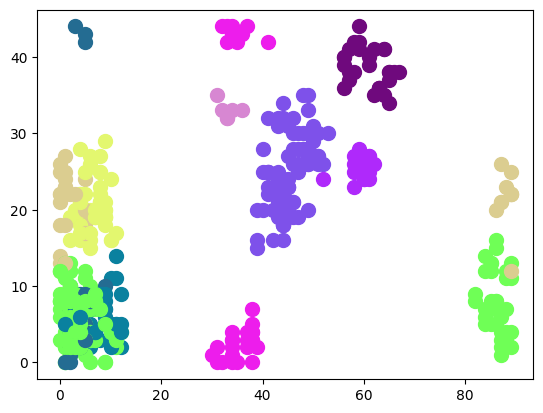

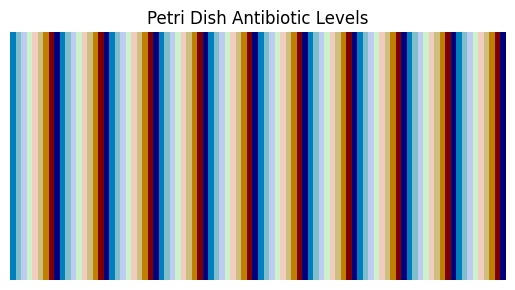

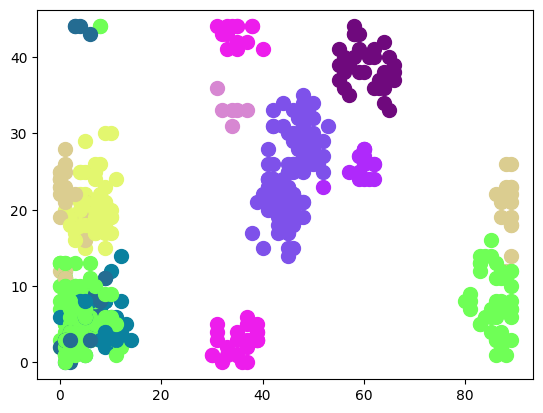

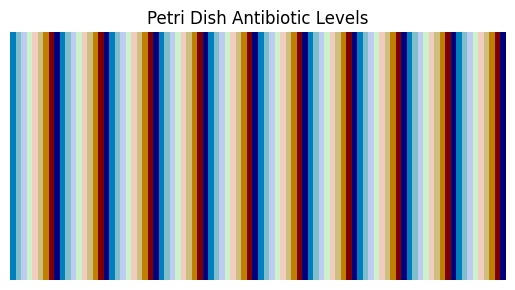

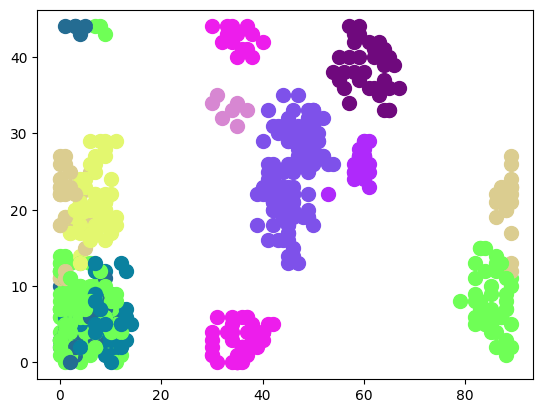

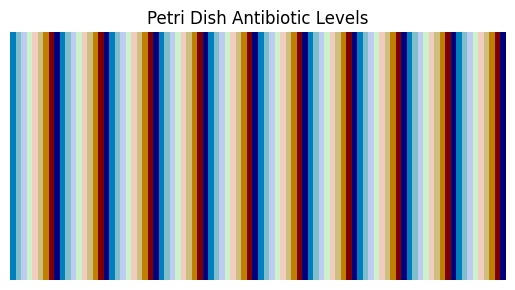

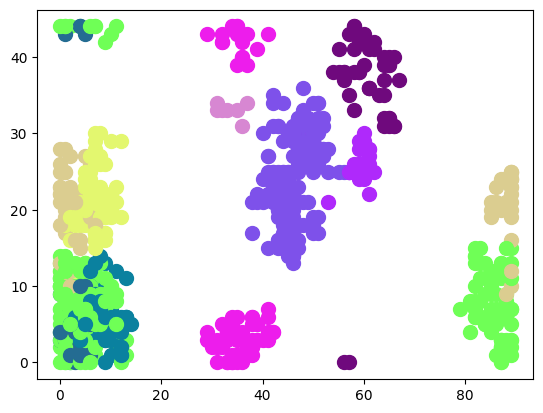

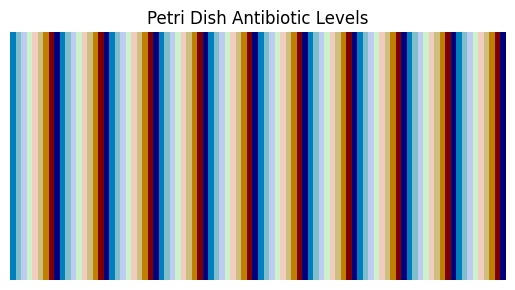

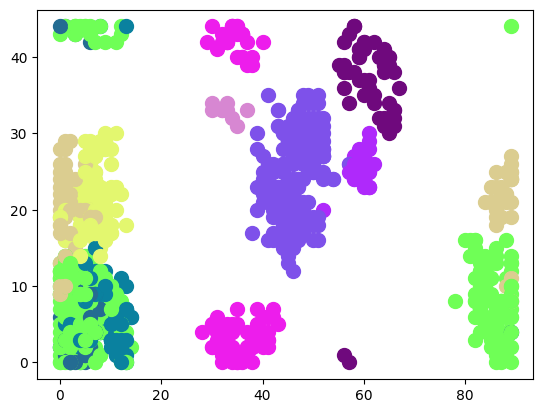

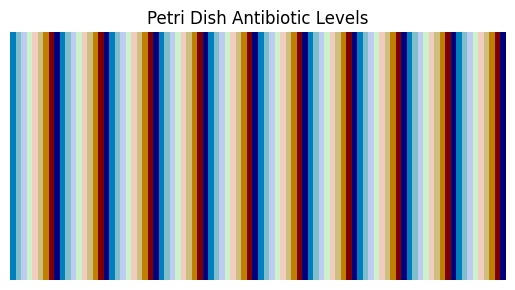

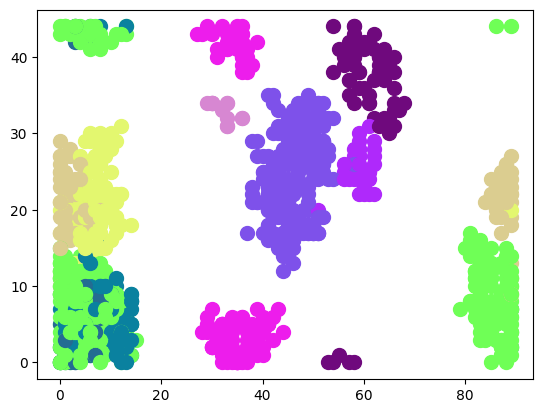

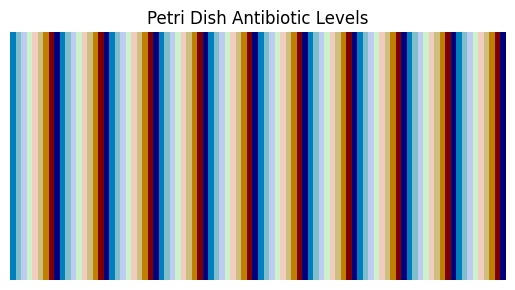

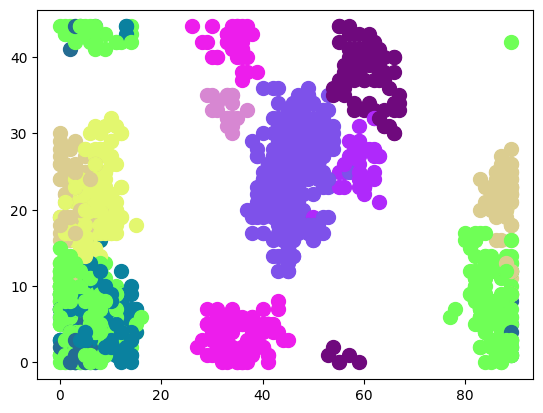

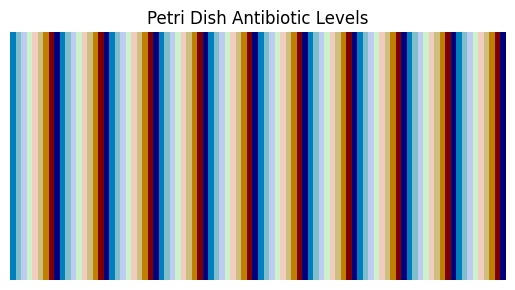

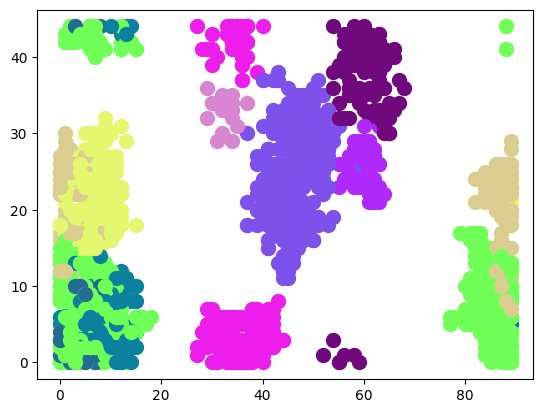

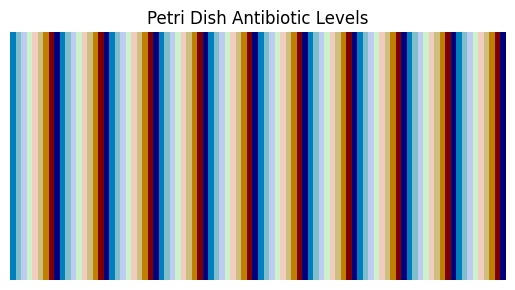

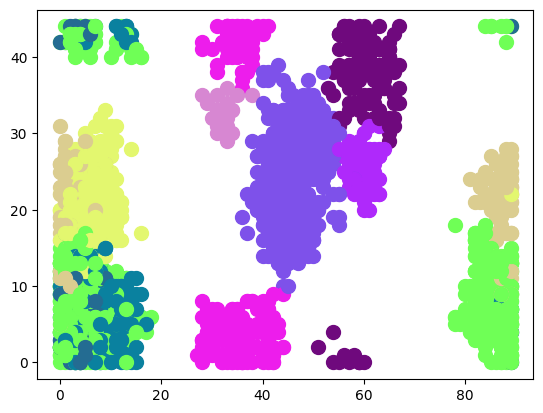

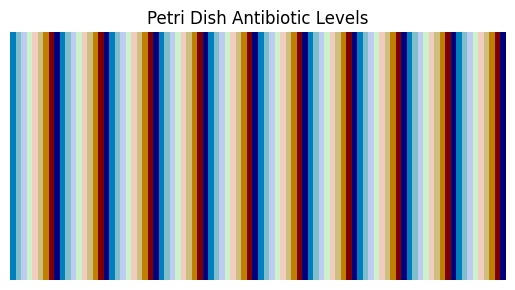

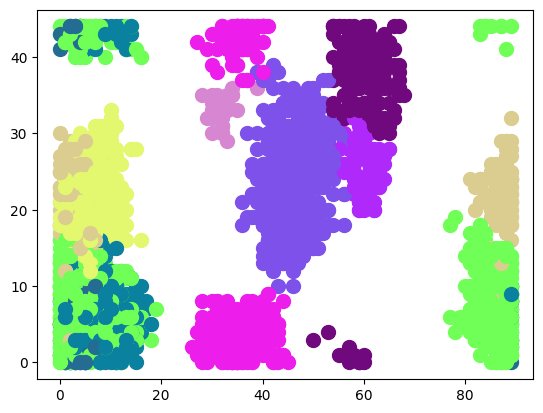

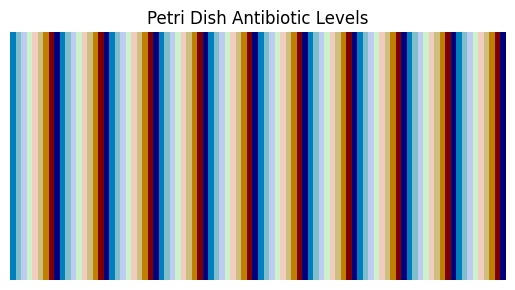

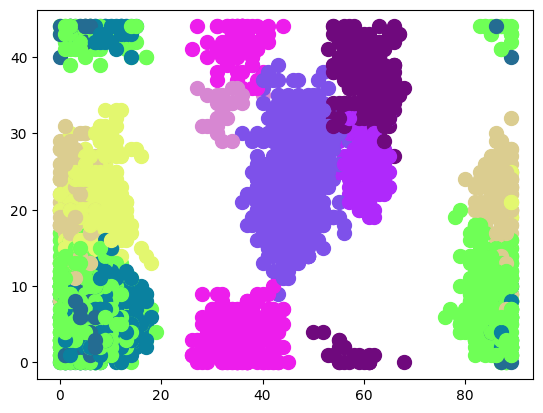

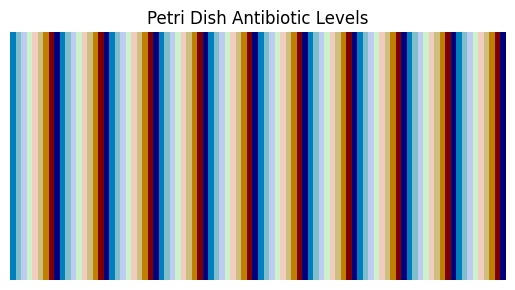

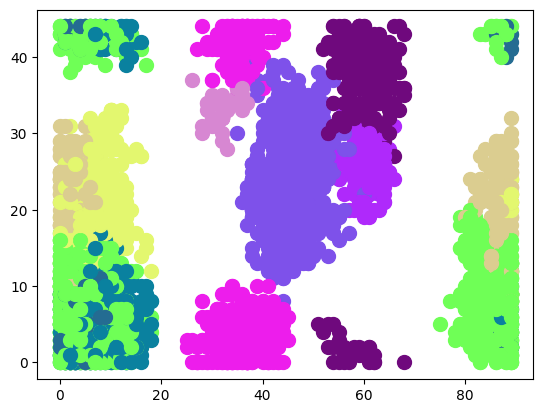

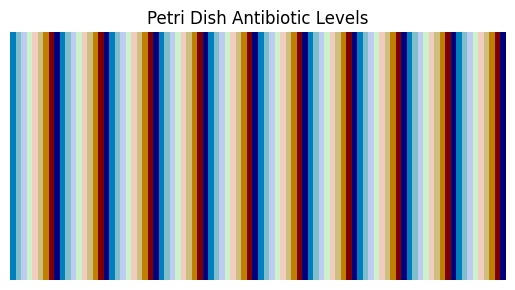

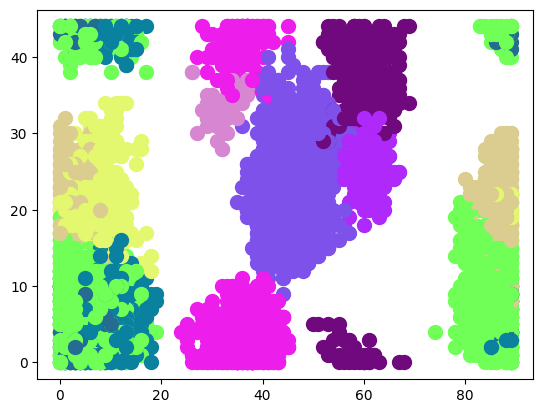

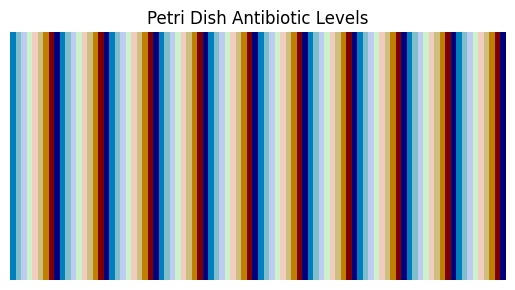

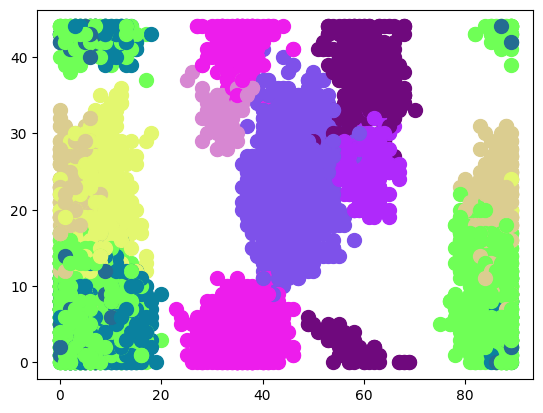

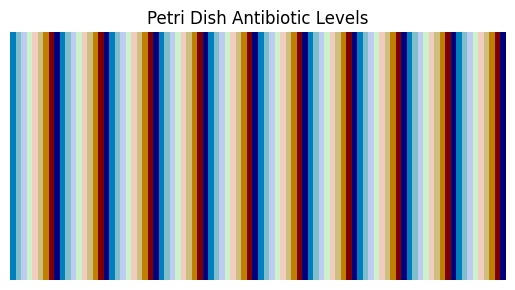

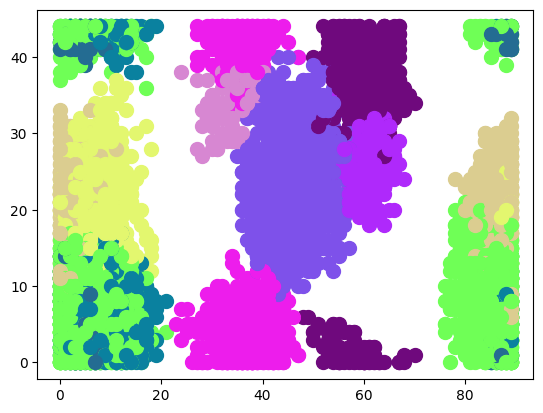

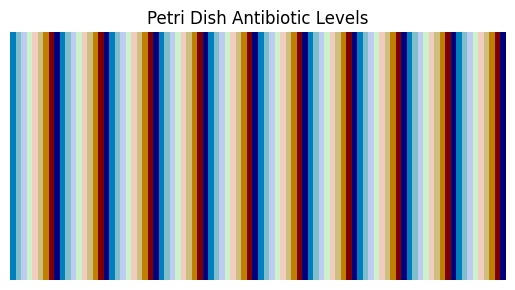

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

class PetriDish:
    def __init__(self, width, height, antibiotic_levels):
        self.width = width
        self.height = height
        self.plate = np.zeros((height, width, 3)) 
        self.set_antibiotic_levels(antibiotic_levels)

    def set_antibiotic_levels(self, antibiotic_levels):
        for i in range(self.height):
            for j in range(self.width):
                r = antibiotic_levels[j % len(antibiotic_levels)]  
                g = antibiotic_levels[(j + 1) % len(antibiotic_levels)]  
                b = antibiotic_levels[(j + 2) % len(antibiotic_levels)]  
                self.plate[i, j] = [r, g, b]

    def draw(self):
        plt.imshow(self.plate)
        plt.title("Petri Dish Antibiotic Levels")
        plt.axis('off')  # Turn off the axis
        plt.show()

class Bacterium:
    def __init__(self, x, y, genome):
        self.x = x  
        self.y = y  
        self.genome = genome  
        self.alive = True

    def move(self):
        if self.alive:
            # Move the bacterium randomly (stay within bounds)
            self.x = (self.x + np.random.randint(-1, 2)) % 90
            self.y = (self.y + np.random.randint(-1, 2)) % 45

    def divide(self):
        # Simple division rule: divide if alive
        if self.alive and np.random.random() > 0.8:  # 20% chance to divide
            return Bacterium(self.x, self.y, self.genome)  # New bacterium at the same position
        return None

    def draw(self):
        r, g, b = self.genome
        plt.scatter(self.x, self.y, color=[r, g, b], s=100)  

# Initialize Petri Dish and Bacteria
antibiotic_levels = [0.0, 0.5, 0.75, 0.8, 0.95, 0.8, 0.75, 0.5, 0.0]
petri_dish = PetriDish(90, 45, antibiotic_levels)

bacteria = [
    Bacterium(np.random.randint(0, 90), np.random.randint(0, 45), [np.random.random(), np.random.random(), np.random.random()]) 
    for _ in range(10)
]

# Main loop to simulate bacteria movement and division
for _ in range(50):  # Run for 50 steps (iterations)
    petri_dish.draw()  # Draw the petri dish
    for bacterium in bacteria:
        bacterium.move()  # Move each bacterium
        new_bacterium = bacterium.divide()  # Check if the bacterium divides
        if new_bacterium:
            bacteria.append(new_bacterium)  # Add the new bacterium to the list
        bacterium.draw()  # Draw the current bacterium
    plt.pause(0.1)  # Pause to update the plot

plt.show()







## &#128721; STOP

Check-in with the rest of the group and with the instructor

----
<a id="someone-else"></a>
## Part 3. Understanding someone else's code

In the pre-class assignment, you spent some time doing a code review of multiple solutions to the same problem. In addition to simply reading unfamiliar code to make sense of it, when we use a new bit of code, if it's reasonably well written there are ways to explore how it works from inside our Jupyter notebooks or within an IPython prompt as well.

Thus far you've been a bit of time trying to write your own solution to the superbug problem in an effort to recreate the anti-bacterial resistance experiment. Maybe you got everything working the way you wanted, or perhaps you've still ironing out a few bugs. **Now we're going to switch gears a bit and look at one possible complete solution to the problem**.

**&#9989; Do This:** To start, you're going to import a script that contains this solution. First, you need to download the script, `superbugs.py`, which you can get here:

`https://raw.githubusercontent.com/msu-cmse-courses/cmse202-supplemental-data/main/code_samples/superbugs.py`

**Run the following cell to import the script once you download it.**

In [ ]:
import superbugs

&#9989; **Do This:** Now, explore the above software, but **don't just look at the code right now**. Use standard exploration commands (e.g. use `help()`, `dir()`, `type`, or `?`) in your notebook to see if you can figure out what "`superbugs`" does/can do. 

In [4]:
import superbugs

dir(superbugs)
type(superbugs)
help(superbugs)





Help on module superbugs:

NAME
    superbugs - superbugs.py

DESCRIPTION
    Contains class definitions for modeling the evolution of bacteria in the
    presence of antibiotics.

CLASSES
    builtins.object
        Bug
        PetriDish
    
    class Bug(builtins.object)
     |  Bug(c=0, r=0, mutation_rate=0.2)
     |  
     |  Bug class. 
     |  
     |  Each bug has 3 genes in the range [0, 1) and a location (c, r) in
     |  a two dimensional grid.
     |  
     |  Attributes:
     |      genes [type: numpy array]
     |          List of three numbers in the range [0, 1) generated uniformly
     |          at random.
     |      
     |      loc [type: tuple]
     |          Ordered pair of coordinates specifying the bug's location.
     |          
     |      mutation_rate [type: float]
     |          The mutation rate for the bacterium
     |      
     |  Methods:
     |      __init__(c=0, r=0, mutation_rate=0.2)
     |          Initialize a bug with random genes and a muta

&#9989; **Do This:** Using the superbugs code, initialize the experiment and display the first time step of the board (t=0). Then, try to take a timestep and visualize the result. Again, **see if you can do this _without_ looking at the source code**.

In [5]:

import superbugs

experiment = superbugs.Experiment() 

experiment.display()  

experiment.advance_timestep()  
experiment.display()  





AttributeError: module 'superbugs' has no attribute 'Experiment'

---
<a id="code-review"></a>
## Part 4. Reviewing the provided code

OK, now that you've managed to learn a bit about the the code to the point where you can initialize the simulation, you're going to take a look at the code and see how it compares to what you came up with.

&#9989; **Do This:** Open `superbugs.py` in a text editor and review the code. How does it work, what classes are available? What are their associated methods and attributes? **Compare and constrast the code with the code that you wrote** (even if you didn't get all bits of your code working). **What parts are similar? What parts are different? What advantages/disadvantages do you see in your approach and this approach?** Discuss this with your group and write down some notes from your discussion.

**If there are parts of the code that you don't understand, talk with your group or ask an instructor for help!**

<font size=+3>&#9998;</font> Do This -  Erase this and record notes from your discussion here.

## &#128721; STOP

Check-in with the rest of the group and with the instructor.

----
<a id="simulation"></a>
## Part 5. Running the Simulation

Now that you understand a bit about how the code works, you're going to try to run a full simulation for a set number of timesteps.

&#9989; **Do This:** Using the petri_dish variable you initialized previously, write an loop that runs the ```timestep``` function followed by the ```draw``` function 10 times.  Make sure to animate the figure (you might need to dig up a previous example to get the animation working).

In [ ]:
# Put your code here


&#9989; **Do This:** You might have noticed that the simulation gets slower as it runs.  **Comment out the plotting and animation code and rerun the simulation with 100 iterations.** Only draw the simulation once it is complete.

&#9989; **Question 3**: Do you notice a change in the simulation run time when you comment out the plotting and animation code? How can you tell?

<font size=+3>&#9998;</font> Do This - Erase the contents of this cell and replace it with your answer to the above question!  (double-click on this text to edit this cell, and hit shift+enter to save the text)

&#9989; **Question 4**: What if you wanted to know exactly how long it took to run the simulation? You might have used the `time` module in your animation code or in previous code you've worked with, but we can also use it to time how long certain pieces of code take to run. We can record an initial time with something like:

`start = time.time()`

And then record the time the code finishes with:

`end = time.time()`

Try adding this to your code above to time exactly how long the simulation took. Add a line to **print the total run time at the end**. Try comparing the total run time to the simulation that includes the plotting and animation components.

**What is the difference in the timing between the versions with (just 10 steps) and without (100 steps) the plotting?**

<font size=+3>&#9998;</font> Do This - Erase the contents of this cell and replace it with your answer to the above question!  (double-click on this text to edit this cell, and hit shift+enter to save the text)

&#9989; **Question 5**: What if you wanted to know how long each step of the simulation took (i.e. each iteration of the loop)? How would you track this information in your code? **If you have time at the end of class, come back to this and try implementing some code that tracks the time that each step took and prints or visualizes the results.**

<font size=+3>&#9998;</font> Do This - Erase the contents of this cell and replace it with your answer to the above question!  (double-click on this text to edit this cell, and hit shift+enter to save the text)

---
<a id="testing"></a>
## Part 6. Testing Scientific Questions

For the remainder of the class, we are going to use this code to ask some scientific questions.

&#9989; **Do This:** Discuss as a group/class the types of scientific question can you could ask (and potentially answer) using this type of simulation.  

<font size=+3>&#9998;</font> Do This - Erase the contents of this cell and replace it with your answer to the above question!  (double-click on this text to edit this cell, and hit shift+enter to save the text)

&#9989; **Question 6:** Given the above questions, what types of measurements or modifications might we need to add to the superbug code? 

<font size=+3>&#9998;</font> Do This - Erase the contents of this cell and replace it with your answer to the above question!  (double-click on this text to edit this cell, and hit shift+enter to save the text)

### Visualizing the progress of the superbugs

If we wanted to use this simulation to answer one of your scientific questions, we might want to visualize the progress of the superbugs as a function of time as they march across the petri dish.

&#9989; **Do This:** Write some code to show, in one graph, the progress of the simulation.  For example: you could plot the number of iterations on the x axis and the progress the bugs have made toward the center of the simulation on the y axis.  

In [ ]:
#Put your code here.


&#9989; **Do This:** Do this, modify or use the simulation in some way that allows you to test a scientific question of the simulation.  

In [ ]:
# put your scientific experiment code here.


&#9989; **Question 7**: What scientific question does your new usage or modification demonstrate and what can you conclude from the simulation?

<font size=+3>&#9998;</font> Do This - Erase the contents of this cell and replace it with your answer to the above question!  (double-click on this text to edit this cell, and hit shift+enter to save the text)

-----
### Congratulations, we're done!

Now, you just need to submit this assignment by uploading it to the course <a href="https://d2l.msu.edu/">Desire2Learn</a> web page for today's submission folder (Don't forget to add your names in the first cell).


&#169; Copyright 2025, Department of Computational Mathematics, Science and Engineering at Michigan State University